In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [10]:
df['district'].value_counts()

,count
district,
Чиланзарский,1616
Мирзо-Улугбекский,1342
Учтепинский,872
Юнусабадский,847
Мирабадский,717
Яккасарайский,628
Яшнободский,456
Шайхантахурский,356
Олмазорский,262


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

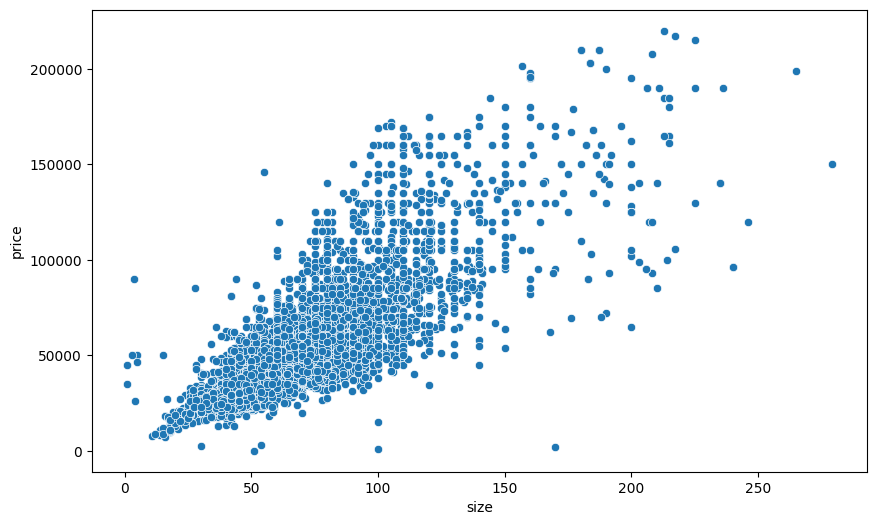

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='size', y='price')
plt.show()

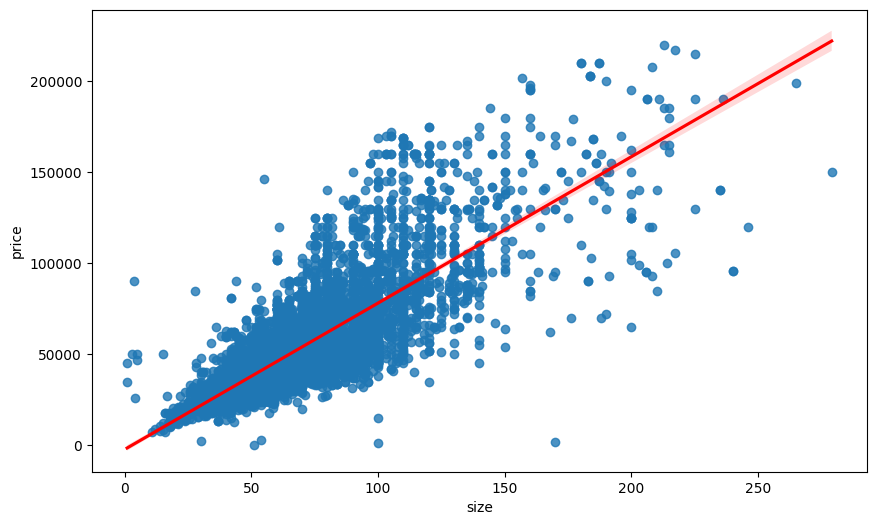

In [13]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.10, random_state=42)

In [16]:
from sklearn import linear_model
MLR_model = linear_model.LinearRegression()
x_train = np.asanyarray(train_set[['size','max_levels']])
y_train = np.asanyarray(train_set[['price']])
MLR_model.fit (x_train, y_train)
print('Coefficients: ', MLR_model.coef_)
print('theta0:', MLR_model.intercept_)

Coefficients:  [[798.23367544 146.11432341]]
theta0: [-2820.23157649]


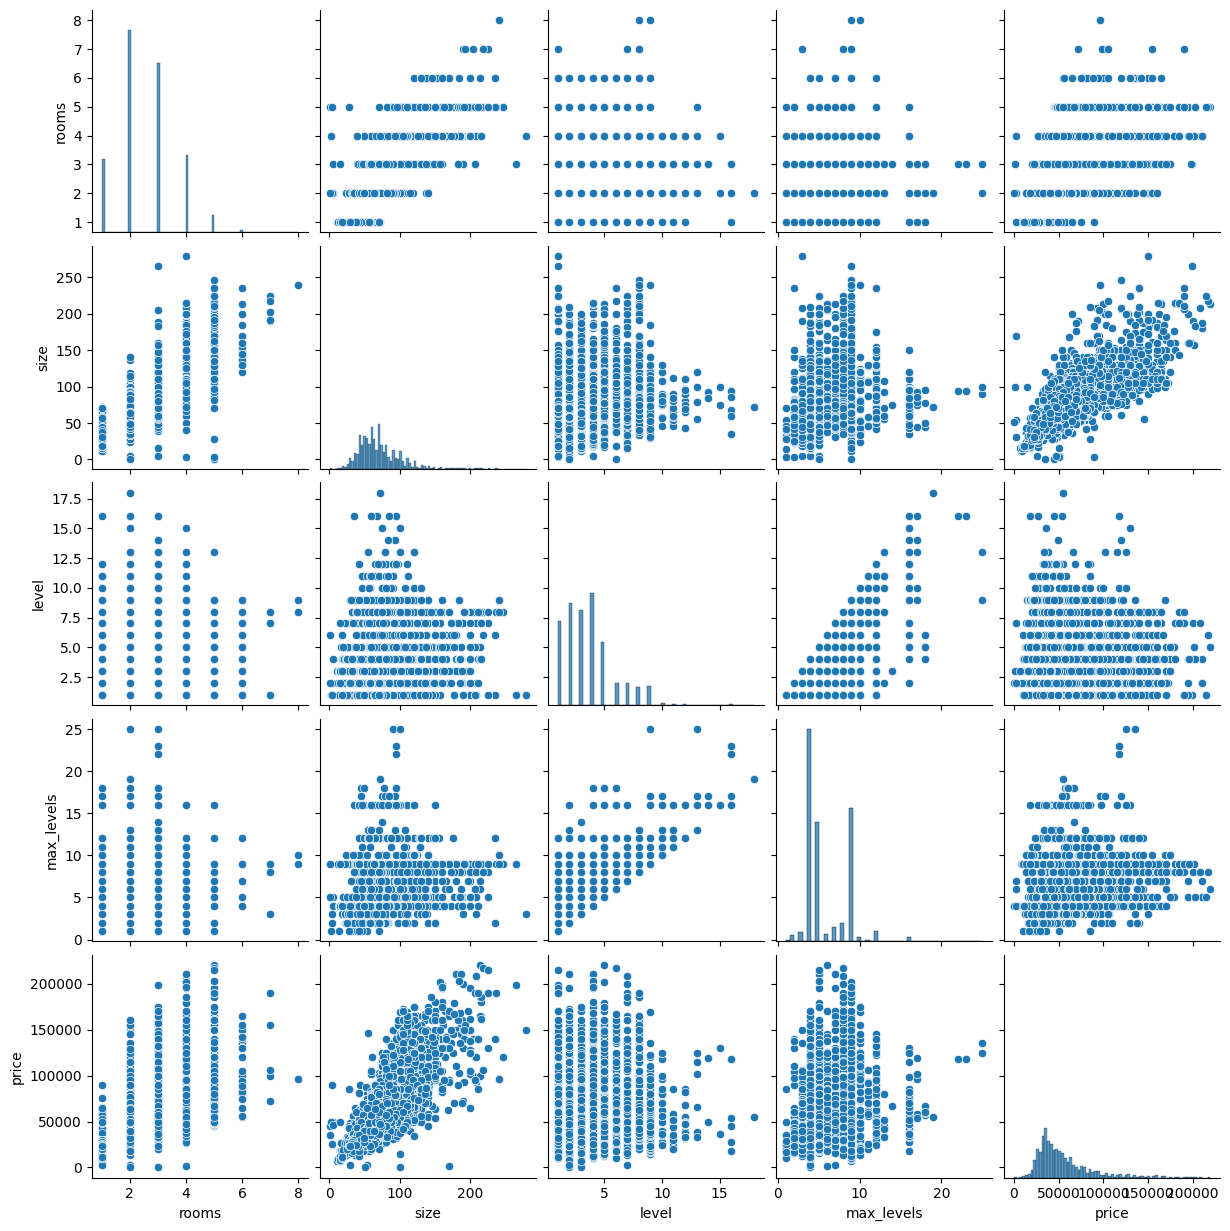

In [ ]:
sns.pairplot(df[['rooms','size','level','max_levels','price']])
plt.show()

In [17]:
x_test = np.asanyarray(test_set[['size','max_levels']])
y_test = np.asanyarray(test_set[['price']])
y_predict = MLR_model.predict(x_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=12319.163382909273
RMSE=np.float64(18036.510978229777)


In [19]:
import pickle
filename = 'LinearRegression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(MLR_model, file)
